# Task Details

# Import Library

In [84]:
import pickle

import pandas as pd
import numpy as np

from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from unidecode import unidecode
import contractions
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from sklearn.model_selection import train_test_split

# Step 1: Data Gathering

In [2]:
df = pd.read_csv('Booking_Jobs_All_220218.csv')
df.head()

,Job Title,Job Description,Location,Team
0,Junior Endpoints Engineer,Booking.com\r\nIt wasn’t so long ago that book...,"Manchester, United Kingdom",Engineering
1,UX Writer - B2B,"At Booking.com, data drives our decisions. Tec...","Amsterdam, Netherlands",Design & User Experience
2,Treasury Risk Specialist,Booking.com’s global treasury team is looking ...,"Amsterdam, Netherlands",Finance
3,Product Manager - Insurance - Policy Admin,About the company\r\nIt wasn’t so long ago tha...,"Manchester, United Kingdom",Product
4,Account Executive - Manchester,Account Executive - Bristol\r\nThis is a full ...,"Manchester, United Kingdom",Business Development & Support


# Step 2 : EDA (Expolratory Data Analysis)

In [3]:
df.columns # To check Number of columns in Dataframe

Index(['Job Title', 'Job Description', 'Location', 'Team'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        653 non-null    object
 1   Job Description  653 non-null    object
 2   Location         653 non-null    object
 3   Team             653 non-null    object
dtypes: object(4)
memory usage: 20.5+ KB


In [5]:
df.isna().sum()

Job Title          0
Job Description    0
Location           0
Team               0
dtype: int64

In [6]:
df.duplicated().sum() # To check Number of duplicate value present in Data to avoid Data Leakage

4

In [7]:
df.drop_duplicates(inplace=True) # To Drop all Duplicate value from data Frame

In [8]:
df.duplicated().sum() # Here we confirm that all duplicate value have drop from data

0

In [9]:
df.Team.value_counts() # To check number of clusters required from Data Frames

Engineering                       193
Business Development & Support    109
People                             68
Security & Infrastructure          49
Design & User Experience           41
Marketing & Communications         36
Product                            35
Data Science & Analytics           33
Customer Service                   25
Leadership                         24
Finance & Legal                    15
Finance                            10
IT Services                         7
Legal & Public Affairs              4
Name: Team, dtype: int64

In [10]:
# To De Minimal Preprocessing From data we remove special characters and spaces
def remove_special_char(data):
    text = re.sub('\W' , ' ' ,data ) #  output only alpha numeric string
    text1 = re.sub('\s+' , ' ' , text) # to remove extra space from string
    return text1
    

In [11]:
# apply to on Job description column
df['job_description'] =df['Job Description'].apply(remove_special_char)


In [12]:
df.drop(['Job Description' , 'Location' ,'Job Title' ] , axis =1 ,inplace=True) # As Per Problem Statement We have
# To use only Job Description columns

In [13]:
df.head(5)

,Team,job_description
0,Engineering,Booking com It wasn t so long ago that booking...
1,Design & User Experience,At Booking com data drives our decisions Techn...
2,Finance,Booking com s global treasury team is looking ...
3,Product,About the company It wasn t so long ago that b...
4,Business Development & Support,Account Executive Bristol This is a full time ...


# Data Visualization
1 ) WordCloude Generator 2 ) Ngrams Visualizor 

# Word Cloud Generation

In [14]:

# To Add all text data from job_description columns
word_cloud_text = df['job_description'].str.cat(sep=' ')
word_cloud_text[:100]

'Booking com It wasn t so long ago that booking a trip to see the Eiffel Tower stroll down New York s'

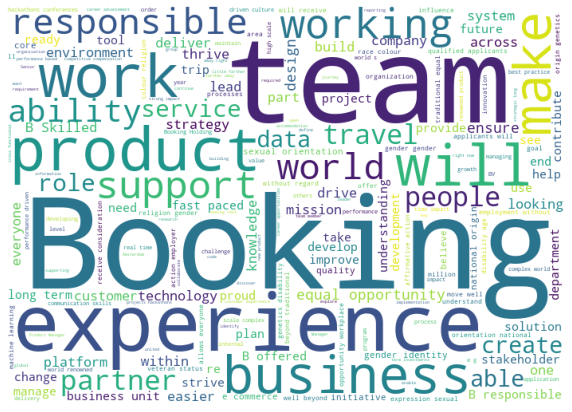

In [15]:
wordcloud = WordCloud(width=700,height=500,background_color='white').generate(word_cloud_text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing 

In [16]:
def text_expansion(data): # Sample text Expansion step 
    return contractions.fix(data)

In [17]:
text_expansion("don't") # Step for only explaination text_expansion

'do not'

In [18]:
def tokens_gen(data): # sample function To split sentence into words
    text =word_tokenize(data)
    return text

In [19]:
tokens_gen('This Is Nlp demo Project') # Step for only explaination of tokens_gen

['This', 'Is', 'Nlp', 'demo', 'Project']

In [20]:
stop_words = stopwords.words('English') # To remove number of stopword from data to
#avoide garbage feeding to data frame
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
def remove_unidecod(data): # To remove ascented characters from data 
    data_decoded = unidecode(data)
    return data_decoded

In [22]:
def cleaning_data(data):
    expanded_text = contractions.fix(data) # To expand Text
    data_decoded = unidecode(expanded_text) #to handle_accented characters
    tokens =word_tokenize(data_decoded) # to create token from data
    stop_words = stopwords.words('English') # to remove word not from stopwords
    # In Below Cean Text we Normalize data , we remove stopwords from data , we taken alphabatic
    # data , length of word is greater than 2 , and free from punctuations
    clean_text = [word.lower() for word in tokens if (word.lower() not in stop_words)
                 and (word not in punctuation) and (len(word) >2 and word.isalpha())]
    lemmetzier=WordNetLemmatizer() # to find root words from data
    root_words =[lemmetzier.lemmatize(data_clean) for data_clean in clean_text ]
    
    return root_words

    
    

In [23]:
print(cleaning_data(df.job_description[0])[:10] , end='') # output of cleaning function

['booking', 'com', 'long', 'ago', 'booking', 'trip', 'see', 'eiffel', 'tower', 'stroll']

In [24]:
df['Clean_Job_Description'] = df.job_description.apply(cleaning_data) # Clean Data added to DF

In [25]:
df # To check how data Frame Looks

,Team,job_description,Clean_Job_Description
0,Engineering,Booking com It wasn t so long ago that booking...,"[booking, com, long, ago, booking, trip, see, ..."
1,Design & User Experience,At Booking com data drives our decisions Techn...,"[booking, com, data, drive, decision, technolo..."
2,Finance,Booking com s global treasury team is looking ...,"[booking, com, global, treasury, team, looking..."
3,Product,About the company It wasn t so long ago that b...,"[company, long, ago, booking, trip, see, eiffe..."
4,Business Development & Support,Account Executive Bristol This is a full time ...,"[account, executive, bristol, full, time, posi..."
...,...,...,...
648,Engineering,It wasn t so long ago that booking a trip so s...,"[long, ago, booking, trip, see, eiffel, tower,..."
649,Engineering,Senior Front End Developer Who are we At Booki...,"[senior, front, end, developer, booking, com, ..."
650,Engineering,At Booking com we make it easier for everyone ...,"[booking, com, make, easier, everyone, experie..."
651,Engineering,Senior Java Developer Who are we At Booking co...,"[senior, java, developer, booking, com, make, ..."


# To Convert Data into Vectors

In [26]:
# To combine text from clean data
def input_text(data):
    text = ' '.join(data) 
    return text
clean_text=df['Clean_Job_Description'].apply(input_text)
clean_text[:5] # Text Required for Count Vectoriser and TFIdf

0    booking com long ago booking trip see eiffel t...
1    booking com data drive decision technology cor...
2    booking com global treasury team looking treas...
3    company long ago booking trip see eiffel tower...
4    account executive bristol full time position b...
Name: Clean_Job_Description, dtype: object

# Vectors Creation Using Count Vectoriser(bag of words)

In [27]:
vector =CountVectorizer(max_df=0.95 , max_features=1500) # Max 1500 Features
count_vector = vector.fit_transform(clean_text)
Count_Vector_df = pd.DataFrame(count_vector.A , columns=vector.get_feature_names_out() )
Count_Vector_df.head(5)

,ability,able,abreast,absorb,accelerate,access,accommodation,according,accordingly,account,...,world,worldwide,would,write,writer,writing,written,year,yes,york
0,1,0,0,1,0,0,0,1,0,0,...,4,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,5,2,8,0,1,0,0
2,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,1,0,0,1,...,4,1,0,1,0,1,0,1,0,1
4,3,0,0,0,0,0,1,0,0,2,...,4,1,0,0,0,0,1,0,1,1


## Vectors Creation Using Count TFIDF Vectoriser (tf * log(inverse df)

In [28]:
vector_Tf =TfidfVectorizer(max_df=0.95 , max_features=1500)
Tfidf_vector =vector_Tf.fit_transform(clean_text)
tf_idf = pd.DataFrame(Tfidf_vector.A , columns=vector_Tf.get_feature_names_out())
tf_idf.head(5)

,ability,able,abreast,absorb,accelerate,access,accommodation,according,accordingly,account,...,world,worldwide,would,write,writer,writing,written,year,yes,york
0,0.019419,0.000000,0.0,0.043866,0.0,0.0,0.000000,0.039992,0.0,0.000000,...,0.058627,0.019419,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031544
1,0.022123,0.024087,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.016698,0.000000,0.0,0.226809,0.104048,0.320112,0.000000,0.017228,0.000000,0.000000
2,0.087626,0.063603,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.018113,0.011373,0.000000,0.000000
3,0.012834,0.013974,0.0,0.000000,0.0,0.0,0.012361,0.000000,0.0,0.020731,...,0.038748,0.012834,0.0,0.026316,0.000000,0.023214,0.000000,0.009995,0.000000,0.020848
4,0.099607,0.000000,0.0,0.000000,0.0,0.0,0.031977,0.000000,0.0,0.107265,...,0.100241,0.033202,0.0,0.000000,0.000000,0.000000,0.041179,0.000000,0.073427,0.053934


In [29]:
# Input Text for Word2Vec it required list inside list type of text
ip_word2vec = [word for word in df['Clean_Job_Description']]
print(ip_word2vec[:5] , end ='')

[['booking', 'com', 'long', 'ago', 'booking', 'trip', 'see', 'eiffel', 'tower', 'stroll', 'new', 'york', 'iconic', 'madison', 'avenue', 'feel', 'sand', 'toe', 'copacabana', 'beach', 'simply', 'matter', 'tap', 'smartphone', 'fact', 'booking', 'com', 'make', 'easier', 'everyone', 'experience', 'world', 'world', 'might', 'feel', 'little', 'farther', 'away', 'right', 'busy', 'preparing', 'world', 'ready', 'travel', 'across', 'office', 'worldwide', 'continue', 'innovate', 'solve', 'complex', 'challenge', 'travel', 'technology', 'plan', 'exciting', 'development', 'lie', 'ahead', 'strategic', 'long', 'term', 'investment', 'believe', 'future', 'travel', 'opening', 'new', 'career', 'opportunity', 'strong', 'impact', 'mission', 'united', 'belief', 'human', 'desire', 'explore', 'planet', 'beauty', 'discover', 'people', 'culture', 'endure', 'world', 'waiting', 'together', 'ready', 'service', 'want', 'service', 'positive', 'impact', 'entire', 'workforce', 'working', 'latest', 'technology', 'global'

In [30]:
model = Word2Vec(sentences =ip_word2vec ,window=8,min_count=1 ) # Word to vec Vectorsier with CBOW architecture
model.save('word2vec.model')

In [31]:
model.wv.most_similar('industry') # To test working of Word2Vec Model 

[('ever', 0.847094714641571),
 ('sector', 0.7929738163948059),
 ('marketplace', 0.7609112858772278),
 ('affinity', 0.7565975785255432),
 ('commerce', 0.7303916811943054),
 ('online', 0.7167242765426636),
 ('travel', 0.715103030204773),
 ('mandatory', 0.700110137462616),
 ('gd', 0.6972806453704834),
 ('license', 0.688389241695404)]

In [32]:
# Creation of word 2 vector

def word2_vec(data,model):
    feature = [] # to append vector of each review
    for rew in data : # iterate over reviews
        zero_vector = np.zeros(model.vector_size) # zero vector for handling key error
        vectors = [] # append vector of each word
        for word in rew:
            if word in model.wv : # we are checking if word is present in model
                try :
                    vectors.append(model.wv[word]) # get vector
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors) #  merging all arrays into a single array
            avg_vec = vectors.mean(axis=0) # average of all vectors
            feature.append(avg_vec) # appending vector of each review
        else :
            feature.append(zero_vector) 
    return feature

In [33]:
x_word_2vec = word2_vec(ip_word2vec,model)
x_word_vec=np.array(x_word_2vec)


# To Build Diffrent model using diffrenet vectoriser

In [34]:
# Kmeans Model Creation function output of this function is model and predict column
def build_model(clusters,data):
    kmeans_model  = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [35]:
# KMeans-Model with count vectoriser vectors (14 Clusters)
kmeans_model_count,y_pred_count = build_model(14,Count_Vector_df)

In [36]:
# Kmeans-Model with Tfidf vectoriser (14 Clusters) 
kmeans_model_tfidf,y_pred_tfidf = build_model(14,tf_idf)

In [37]:
# Kmeans -Model with Word2Vec Vectoriser (14 Clusters)
kmeans_model_word2vec,y_pred_word2vec= build_model(14,x_word_vec)

# Evaluation Of Data

In [38]:
#Evaluation using silhouette visualiser
print(f"Silhouette score of KMeans-Count : {silhouette_score(Count_Vector_df,y_pred_count)}")
print(f"Silhouette score of KMeans-Tfidf : {silhouette_score(tf_idf,y_pred_tfidf)}")
print(f"Silhouette score of KMeans-word2vec : {silhouette_score(x_word_vec,y_pred_word2vec)}")

Silhouette score of KMeans-Count : 0.07151063845962405
Silhouette score of KMeans-Tfidf : 0.11458464213899155
Silhouette score of KMeans-word2vec : 0.1709732562303543


#### We Found That best result received using Kmeans and Word2Vec Vectors

In [39]:
#Visualisation of Cluster Created By KMEANS 
def visualize_silhouette(data,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    plt.title(f"{title1}")
    

C:\Users\GhanaPallavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


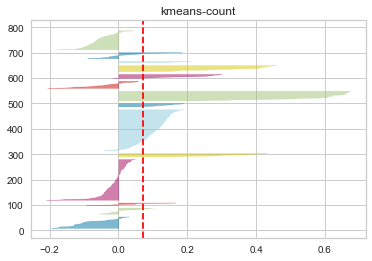

In [40]:
# kmeans-count 
visualize_silhouette(Count_Vector_df,kmeans_model_count,"kmeans-count")

C:\Users\GhanaPallavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


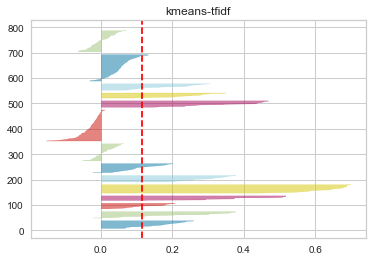

In [41]:
# kmeans-tfidf
visualize_silhouette(tf_idf,kmeans_model_tfidf,"kmeans-tfidf")

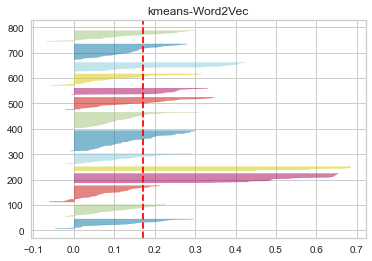

In [42]:
# kmeans-Word2Vec
visualize_silhouette(x_word_vec,kmeans_model_word2vec,"kmeans-Word2Vec")

# From Above It cleared that we obtained good Results with Word2Vec vectors score is towards + ve side


# Ngrmas Visualisation From Data

In [44]:
def ngrams_visual(data ,n_grms):
    ngrams_ = ngrams(data ,n_grms)
    return ngrams_
zip_file = df['Clean_Job_Description'].apply(lambda x:ngrams_visual(x , 2)) # Bigrams Visualisaton  
ngrams_total =[] 
for zip_ in zip_file:
    ng =[]
    for ngrams_ in zip_:
        ng.append(' '.join([ngrams_[0],ngrams_[1]]))
    ngrams_total.extend(ng)
from collections import  Counter
Counter(ngrams_total).most_common(30)
      

[('booking com', 3160),
 ('equal opportunity', 560),
 ('experience world', 541),
 ('everyone experience', 484),
 ('make easier', 408),
 ('easier everyone', 387),
 ('fast paced', 353),
 ('business unit', 322),
 ('long term', 310),
 ('year experience', 310),
 ('opportunity work', 309),
 ('gender identity', 286),
 ('sexual orientation', 286),
 ('national origin', 285),
 ('qualified applicant', 281),
 ('applicant receive', 281),
 ('receive consideration', 281),
 ('consideration employment', 281),
 ('employment without', 280),
 ('without regard', 280),
 ('gender gender', 280),
 ('veteran status', 280),
 ('work create', 279),
 ('regard race', 276),
 ('religion gender', 276),
 ('identity expression', 276),
 ('expression sexual', 276),
 ('orientation national', 276),
 ('origin genetics', 276),
 ('genetics disability', 276)]

In [45]:
# Trigrams Visualization

In [46]:
def ngrams_visual(data ,n_grms):
    ngrams_ = ngrams(data ,n_grms)
    return ngrams_
zip_file = df['Clean_Job_Description'].apply(lambda x:ngrams_visual(x , 3)) 
ngrams_total =[] 
for zip_ in zip_file:
    ng =[]
    for ngrams_ in zip_:
        ng.append(' '.join([ngrams_[0],ngrams_[1] ,ngrams_[2]]))
    ngrams_total.extend(ng)
from collections import  Counter
Counter(ngrams_total).most_common(30)

[('everyone experience world', 484),
 ('easier everyone experience', 384),
 ('make easier everyone', 373),
 ('qualified applicant receive', 281),
 ('applicant receive consideration', 281),
 ('receive consideration employment', 281),
 ('consideration employment without', 280),
 ('employment without regard', 280),
 ('gender gender identity', 280),
 ('without regard race', 276),
 ('religion gender gender', 276),
 ('gender identity expression', 276),
 ('identity expression sexual', 276),
 ('expression sexual orientation', 276),
 ('sexual orientation national', 276),
 ('orientation national origin', 276),
 ('national origin genetics', 276),
 ('origin genetics disability', 276),
 ('genetics disability age', 276),
 ('equal opportunity workplace', 275),
 ('opportunity workplace affirmative', 275),
 ('workplace affirmative action', 275),
 ('affirmative action employer', 275),
 ('action employer qualified', 275),
 ('employer qualified applicant', 275),
 ('veteran status strive', 275),
 ('status 

In [47]:
# Creation of Diffrent Data Frame to find Kyphrases from train data 
# I Used here root cause analysis type approch

In [48]:
df

,Team,job_description,Clean_Job_Description
0,Engineering,Booking com It wasn t so long ago that booking...,"[booking, com, long, ago, booking, trip, see, ..."
1,Design & User Experience,At Booking com data drives our decisions Techn...,"[booking, com, data, drive, decision, technolo..."
2,Finance,Booking com s global treasury team is looking ...,"[booking, com, global, treasury, team, looking..."
3,Product,About the company It wasn t so long ago that b...,"[company, long, ago, booking, trip, see, eiffe..."
4,Business Development & Support,Account Executive Bristol This is a full time ...,"[account, executive, bristol, full, time, posi..."
...,...,...,...
648,Engineering,It wasn t so long ago that booking a trip so s...,"[long, ago, booking, trip, see, eiffel, tower,..."
649,Engineering,Senior Front End Developer Who are we At Booki...,"[senior, front, end, developer, booking, com, ..."
650,Engineering,At Booking com we make it easier for everyone ...,"[booking, com, make, easier, everyone, experie..."
651,Engineering,Senior Java Developer Who are we At Booking co...,"[senior, java, developer, booking, com, make, ..."


In [49]:
df['Clusters'] = y_pred_word2vec

In [50]:
df

,Team,job_description,Clean_Job_Description,Clusters
0,Engineering,Booking com It wasn t so long ago that booking...,"[booking, com, long, ago, booking, trip, see, ...",1
1,Design & User Experience,At Booking com data drives our decisions Techn...,"[booking, com, data, drive, decision, technolo...",1
2,Finance,Booking com s global treasury team is looking ...,"[booking, com, global, treasury, team, looking...",10
3,Product,About the company It wasn t so long ago that b...,"[company, long, ago, booking, trip, see, eiffe...",5
4,Business Development & Support,Account Executive Bristol This is a full time ...,"[account, executive, bristol, full, time, posi...",3
...,...,...,...,...
648,Engineering,It wasn t so long ago that booking a trip so s...,"[long, ago, booking, trip, see, eiffel, tower,...",7
649,Engineering,Senior Front End Developer Who are we At Booki...,"[senior, front, end, developer, booking, com, ...",0
650,Engineering,At Booking com we make it easier for everyone ...,"[booking, com, make, easier, everyone, experie...",5
651,Engineering,Senior Java Developer Who are we At Booking co...,"[senior, java, developer, booking, com, make, ...",13


In [51]:
kmeans_model_word2vec.cluster_centers_

array([[-0.01990486,  0.12153843, -0.04100456, ..., -0.2153608 ,
         0.09002744,  0.10585674],
       [ 0.01778905,  0.23997572, -0.00582289, ..., -0.34192884,
         0.26762563,  0.11278909],
       [-0.08791228, -0.01805268, -0.34554014, ..., -0.0686557 ,
         0.08057027,  0.08019893],
       ...,
       [ 0.00332188,  0.11448418, -0.38360703, ..., -0.14248732,
         0.13980605,  0.03144486],
       [-0.03268742,  0.11462952, -0.162871  , ..., -0.24288788,
         0.08771317,  0.09440107],
       [-0.11649451, -0.01852562, -0.18870679, ..., -0.12194111,
         0.06063394,  0.12223187]], dtype=float32)

In [52]:
# To Fetch Data From Diffrent Clusters 

In [53]:
text_13_class = df.groupby('Clusters').get_group(13).job_description.str.cat(sep =' ') 

In [54]:
text_12_class = df.groupby('Clusters').get_group(12).job_description.str.cat(sep =' ')

In [55]:
text_11_class = df.groupby('Clusters').get_group(11).job_description.str.cat(sep =' ')

In [56]:
text_10_class = df.groupby('Clusters').get_group(10).job_description.str.cat(sep =' ')

In [57]:
text_9_class = df.groupby('Clusters').get_group(9).job_description.str.cat(sep =' ')

In [58]:
text_8_class = df.groupby('Clusters').get_group(8).job_description.str.cat(sep =' ')

In [59]:
text_7_class = df.groupby('Clusters').get_group(7).job_description.str.cat(sep =' ')

In [60]:
text_6_class = df.groupby('Clusters').get_group(6).job_description.str.cat(sep =' ')

In [61]:
text_5_class = df.groupby('Clusters').get_group(5).job_description.str.cat(sep =' ')

In [62]:
text_4_class = df.groupby('Clusters').get_group(4).job_description.str.cat(sep =' ')

In [63]:
text_3_class = df.groupby('Clusters').get_group(3).job_description.str.cat(sep =' ')

In [64]:
text_2_class = df.groupby('Clusters').get_group(2).job_description.str.cat(sep =' ')

In [65]:
text_1_class = df.groupby('Clusters').get_group(1).job_description.str.cat(sep =' ')

In [66]:
text_0_class = df.groupby('Clusters').get_group(0).job_description.str.cat(sep =' ')

In [67]:
# Key Phrase Extractor
import yake 
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords: 
        keyword_list.append(kw[0])
        
    return keyword_list


In [68]:
text_of_classes =[text_0_class ,text_1_class ,text_2_class ,text_3_class ,text_4_class ,text_5_class ,
                 text_6_class ,text_7_class ,text_8_class , text_9_class ,text_10_class ,text_11_class ,
                  text_12_class,text_13_class]

In [69]:
dict_of_key_phrases =dict() # Blank Dictionary
for index , text in enumerate (text_of_classes):#To fetch data from every cluster assign index as key and keyphrases as value
    dict_of_key_phrases['class{}'.format(index)] = yake_extractor(text)
dict_of_key_phrases

{'class0': ['Technology Product Manager',
  'booking teams products',
  'product team Booking',
  'End Developer Booking',
  'Customer Service Center',
  'product development teams',
  'Service Center Shanghai',
  'Booking Deal including',
  'Product Manager Booking',
  'Flights Apps Team',
  'end customer experience',
  'Software Development Experience',
  'end developers product',
  'App Experience working',
  'iOS Developer Booking',
  'developers product owners',
  'improve customer experience',
  'Booking Data services',
  'Android development experience',
  'Flights product experience'],
 'class1': ['Strong working knowledge',
  'Machine Learning Scientist',
  'Booking Deal including',
  'machine learning products',
  'Python Strong working',
  'Europe Amsterdam Performance',
  'engineering solutions Technical',
  'machine learning models',
  'data machine learning',
  'work experience Masters',
  'equal opportunity workplace',
  'relevant work experience',
  'traditional equal o

In [70]:
list_of_key =['Business Development & Support' ,'Data Science & Analytics' ,'Customer Service '
'Finance & Legal' ,'Product' ,'Leadership','Design & User Experience ','Engineering ','Marketing & Communications' ,
'IT Services' ,'Finance' ,'Security & Infrastructure','Legal & Public Affairs' ,'People'  ]
# to create Value of Key for diffrent cluster i used domain knowledge to assign key for specific cluster

In [71]:
# Assign Key to Diffrent Cluster using zip function

key_phrases_clusterwise = dict(zip(list_of_key ,dict_of_key_phrases.values()))
print(key_phrases_clusterwise , end =' ')

{'Business Development & Support': ['Technology Product Manager', 'booking teams products', 'product team Booking', 'End Developer Booking', 'Customer Service Center', 'product development teams', 'Service Center Shanghai', 'Booking Deal including', 'Product Manager Booking', 'Flights Apps Team', 'end customer experience', 'Software Development Experience', 'end developers product', 'App Experience working', 'iOS Developer Booking', 'developers product owners', 'improve customer experience', 'Booking Data services', 'Android development experience', 'Flights product experience'], 'Data Science & Analytics': ['Strong working knowledge', 'Machine Learning Scientist', 'Booking Deal including', 'machine learning products', 'Python Strong working', 'Europe Amsterdam Performance', 'engineering solutions Technical', 'machine learning models', 'data machine learning', 'work experience Masters', 'equal opportunity workplace', 'relevant work experience', 'traditional equal opportunity', 'softwar

# Split data into Train Test Split

In [72]:
x =word2_vec([ word for word in df['Clean_Job_Description']],model)
y = df['Clusters']

In [73]:
x_train ,x_test, y_train ,y_test  = train_test_split(x,y , train_size=0.8 , random_state=1)


# Model Building

In [74]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc .fit(x_train , y_train)


SVC()

In [75]:
y_pred = model_svc.predict(x_test)
y_pred[:5]

array([ 0,  8,  2, 13,  2])

# Model Evaluation

In [76]:
from sklearn.metrics import classification_report ,accuracy_score , confusion_matrix

In [77]:
def model_evaluation(y_act , y_pred):
    
    print(f"Classification report : \n {classification_report(y_act , y_pred)}")
    print('*'*25)
    print(f"Accuracy score of Model : \n{accuracy_score(y_act , y_pred)}")
    print('*'*25)
    print(f"Confusion Metric For Model : \n{confusion_matrix(y_act , y_pred)}")

In [78]:
model_evaluation(y_test , y_pred)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      0.60      0.75         5
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        13
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         5
          10       0.83      0.83      0.83         6
          11       1.00      0.62      0.77         8
          12       0.74      0.93      0.82        15
          13       0.91      0.83      0.87        12

    accuracy                           0.92       130
   macro avg       0.94      0.90      0.91       130
weighted avg       0.92      0.92      0.91       130


In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
hyp_model = SVC()
hyp = {
    "C" : np.arange(1,11),
    'kernel': ['linear','poly','rbf', 'sigmoid']
}
rscv = RandomizedSearchCV(hyp_model, hyp, cv = 5)
rscv.fit(x_train, y_train)
svc_hyp =rscv.best_estimator_

In [81]:
with open('svc_hyp.pkl' , 'wb') as file:
    pickle.dump(model_svc , file)

In [82]:
y_predict = svc_hyp.predict(x_test)
model_evaluation(y_test , y_pred)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      0.60      0.75         5
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        13
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         5
          10       0.83      0.83      0.83         6
          11       1.00      0.62      0.77         8
          12       0.74      0.93      0.82        15
          13       0.91      0.83      0.87        12

    accuracy                           0.92       130
   macro avg       0.94      0.90      0.91       130
weighted avg       0.92      0.92      0.91       130


# Prediction Function Generation

In [128]:
df.job_description[1]

'At Booking com data drives our decisions Technology is at our core And innovation is everywhere But our company is more than datasets lines of code or A B tests We re the thrill of the first night in a new place The excitement of the next morning The friends you make The journeys you take The sights you see And the food you sample Through our products partners and people we make it easier for everyone to experience the world We re looking for a UX Copywriter to join our writing team in Marketing supporting our Business Travel department We re a close knit writing community made up of around 15 writers both Creative Copywriters and UX Writers who collaborate across products and integrated marketing campaigns Our goal is to deliver a seamless digital experience for our customers through one voice that builds trust and engagement with our brand and enhances the platform experience for all of our users UX Copywriters in Marketing are embedded in product teams and work alongside designers 

In [106]:
      with open ('svc_hyp.pkl' , 'rb') as file1:
            svm_model = pickle.load(file1) 

In [112]:

with open ('word2vec.model' , 'rb') as file:
    wordvec_model = pickle.load(file)

In [118]:
def word2_vec(data):
    
    feature = [] # to append vector of each review
    for rew in data : # iterate over reviews
        zero_vector = np.zeros( wordvec_model.vector_size) # zero vector for handling key error
        vectors = [] # append vector of each word
        for word in rew:
            if word in wordvec_model.wv : # we are checking if word is present in model
                try :
                    vectors.append(wordvec_model.wv[word]) # get vector

                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors) #  merging all arrays into a single array
            avg_vec = vectors.mean(axis=0) # average of all vectors
            feature.append(avg_vec) # appending vector of each review
        else :
            feature.append(zero_vector) 
    return feature

In [121]:
def remove_special_char(data):
    
    text = re.sub('\W' , ' ' ,data ) #  output only alpha numeric string
    text1 = re.sub('\s+' , ' ' , text) # to remove extra space from string
    expanded_text = contractions.fix(text1) # To expand Text
    data_decoded = unidecode(expanded_text) #to handle_accented characters
    tokens =word_tokenize(data_decoded) # to create token from data
    stop_words = stopwords.words('English') # to remove word not from stopwords
           # In Below Cean Text we Normalize data , we remove stopwords from data , we taken alphabatic
            # data , length of word is greater than 2 , and free from punctuations
    clean_text = [word.lower() for word in tokens if (word.lower() not in stop_words)
                        and (word not in punctuation) and (len(word) >2 and word.isalpha())]
    lemmetzier=WordNetLemmatizer()
    root_words =[lemmetzier.lemmatize(data_clean) for data_clean in clean_text ]
    input_word2vec = [[word for word in root_words ]]
    vector_ = word2_vec(input_word2vec)
        
    result = svm_model.predict([vector_[0]])[0]
    
    if result == 0:
        return print('Business Development & Support')
    if result == 1: 
        return print('Data Science & Analytics')
    if result == 2: 
        return 'Customer Service'
    if result == 3: 
        return 'Finance & Legal'
    if result == 4: 
        return 'Product'
    if result == 5: 
        return 'Leadership'
    if result == 6: 
        return 'Design & User Experience '
    if result == 7: 
        return 'Engineering '
    if result == 8: 
        return 'Marketing & Communications'
    if result == 9: 
        return 'IT Services'
    if result == 10: 
        return 'Finance'
    if result == 11: 
        return 'Security & Infrastructure'
    if result == 12: 
        return 'Legal & Public Affairs'
    if result == 13: 
        return 'People'



In [129]:
remove_special_char(df.job_description[1])

Data Science & Analytics
